# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [62]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from ainvert import A_invert as Ai
from math import floor
import time

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

def imread(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
def plot_img(img, cmap='gray', title=''):
    plt.figure(figsize=(img.shape[0]/30,img.shape[1]/30))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
lena = imread('lena.bmp')
clock = imread('clock.bmp')
chessboard = imread('chessboard.bmp')

In [63]:
def interpolate_bicubic(img, scale_h, scale_w):
    if scale_h <= 0 or scale_w <= 0:
        raise ValueError("Scaling factors must be greater than 0.")
    
    def Ax(y, x):
        if 0 < x < img.shape[1] - 1:
            return (img[y, x + 1] - img[y, x - 1]) / 2
        return 0
    
    def Ay(y, x):
        if 0 < y < img.shape[0] - 1:
            return (img[y + 1, x] - img[y - 1, x]) / 2
        return 0
    
    def Axy(y, x):
        if 0 < y < img.shape[0] - 1 and 0 < x < img.shape[1] - 1:
            return (img[y + 1, x + 1] - img[y - 1, x + 1] - img[y + 1, x - 1] + img[y - 1, x - 1]) / 4
        return 0
            
    old_h, old_w = img.shape
    new_h = int(old_h * scale_h)
    new_w = int(old_w * scale_w)
    
    img = img.astype(np.int32)
    result = np.zeros((new_h, new_w), dtype=np.int32)

    for y in range(new_h):
        for x in range(new_w):
            A_y = floor(y / scale_h)
            A_x = floor(x / scale_w)
            
            B_y = min(A_y, old_h-1)
            B_x = min(A_x + 1, old_w-1)
            
            C_y = min(A_y + 1, old_h-1)
            C_x = min(A_x + 1, old_w-1)
            
            D_y = min(A_y + 1, old_h-1)
            D_x = min(A_x, old_w-1)
            
            x_param = np.array(
                [img[A_y, A_x], img[B_y, B_x], img[D_y, D_x], img[C_y, C_x],
                 Ax(A_y, A_x),  Ax(B_y, B_x),  Ax(D_y, D_x),  Ax(C_y, C_x),
                 Ay(A_y, A_x),  Ay(B_y, B_x),  Ay(D_y, D_x),  Ay(C_y, C_x),
                 Axy(A_y, A_x), Axy(B_y, B_x), Axy(D_y, D_x), Axy(C_y, C_x)], dtype=np.float64)
            
            a = Ai @ x_param
            a = a.reshape((4, 4)).T
            
            # interpolation weights
            i = y / scale_h - A_y # vertical
            j = x / scale_w - A_x # horizontal
            
            result[y, x] = j**np.array([0, 1, 2, 3]) @ a @ np.power(i, [0, 1, 2, 3])

    return np.clip(result, 0, 255)

In [64]:
def interpolate_bilinear(img, scale_h, scale_w):
    if scale_h <= 0 or scale_w <= 0:
        raise ValueError("Scaling factors must be greater than 0.")
        
    old_h, old_w = img.shape
    new_h = int(old_h * scale_h)
    new_w = int(old_w * scale_w)
    
    result = np.zeros((new_h, new_w), dtype=np.uint8)
    
    for y in range(new_h):
        for x in range(new_w):
            A_y = floor(y / scale_h)
            A_x = floor(x / scale_w)
            
            B_y = min(A_y, old_h-1)
            B_x = min(A_x + 1, old_w-1)
            
            C_y = min(A_y + 1, old_h-1)
            C_x = min(A_x + 1, old_w-1)
            
            D_y = min(A_y + 1, old_h-1)
            D_x = min(A_x, old_w-1)

            # interpolation weights
            i = y / scale_h - A_y # vertical
            j = x / scale_w - A_x # horizontal
            
            interpolated_value = np.array([[1 - i, i]]) \
                @ np.array([[img[A_y, A_x], img[B_y, B_x]],
                            [img[D_y, D_x], img[C_y, C_x]]]) \
                @ np.array([[1 - j], [j]])

            result[y, x] = int(interpolated_value.item())
    return result

In [65]:
def compare_interpolation_methods(image, scale_h, scale_w, image_name="Image"):
    start_time = time.time()
    bicubic_result = interpolate_bicubic(image, scale_h, scale_w)
    bicubic_time = time.time() - start_time

    start_time = time.time()
    bilinear_result = interpolate_bilinear(image, scale_h, scale_w)
    bilinear_time = time.time() - start_time

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(bicubic_result, cmap='gray')
    axes[0].set_title(f"{image_name} - Bicubic Interpolation\nTime: {bicubic_time:.4f}s")
    axes[0].axis('off')
    
    axes[1].imshow(bilinear_result, cmap='gray')
    axes[1].set_title(f"{image_name} - Bilinear Interpolation\nTime: {bilinear_time:.4f}s")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

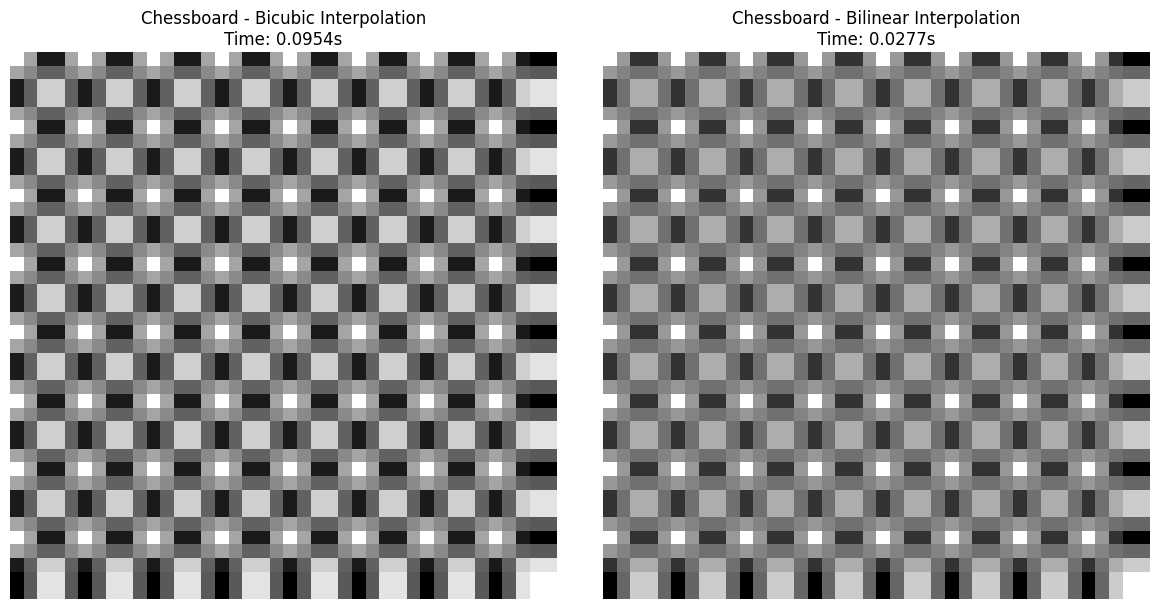

In [66]:
compare_interpolation_methods(chessboard, 2.5, 2.5, "Chessboard")

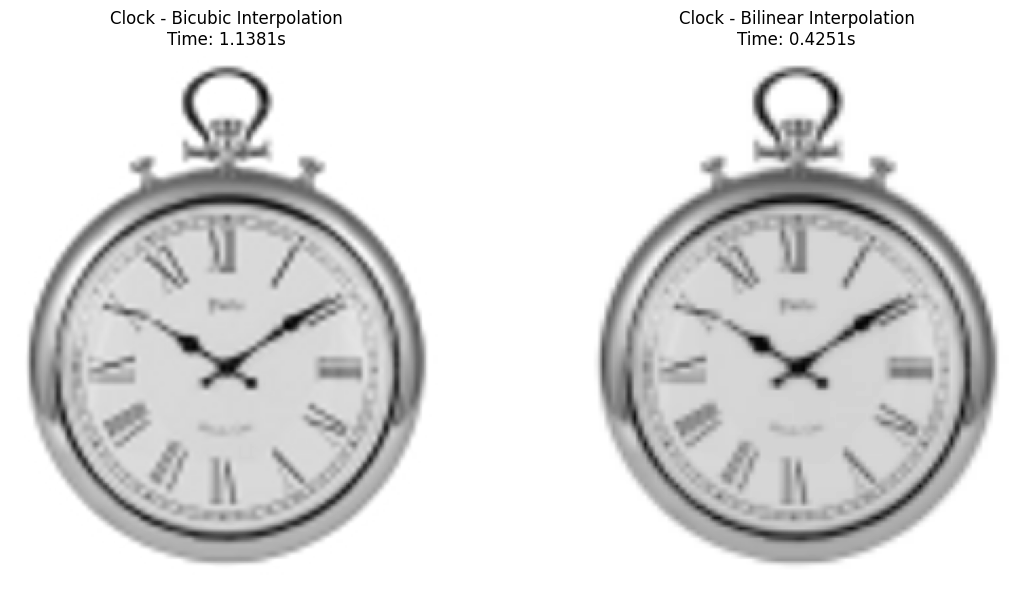

In [67]:
compare_interpolation_methods(clock, 2.5, 2.5, "Clock")

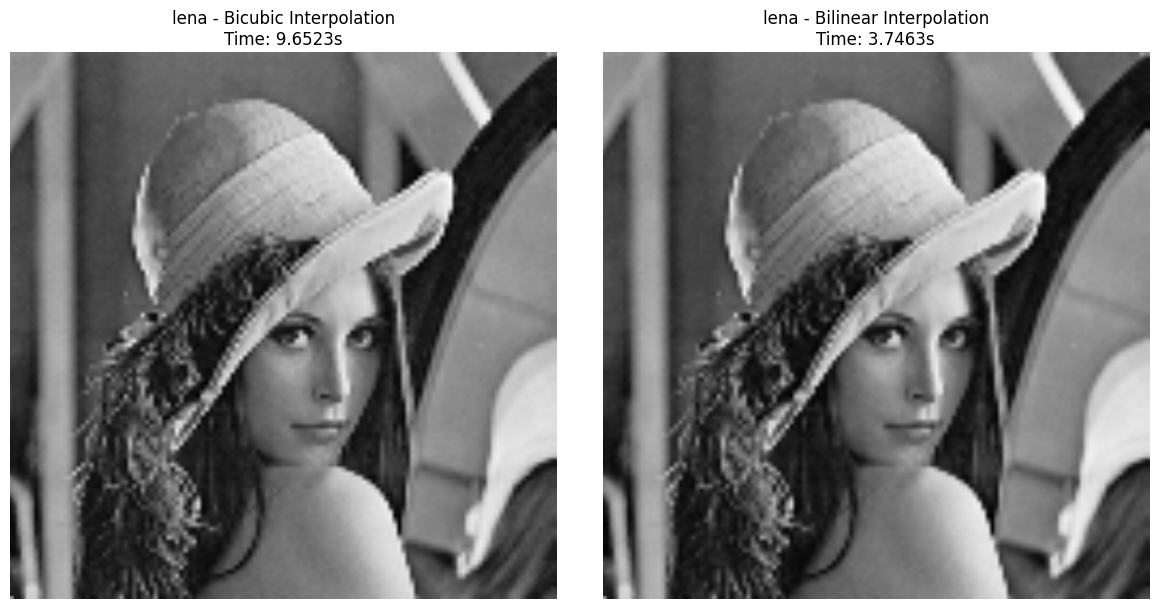

In [68]:
compare_interpolation_methods(lena, 2.5, 2.5, "lena")

In [ ]:
# Początkowo przy przeskalowaniu obrazu 1.8 razy nie dało się zauważyć istotnej różnicy, natomiast x2.5 już pozwala zaobserwować pewne zmiany.
# Interpolacja dwusześcienna jest znacznie bardziej ymagająca obliczeniowo i pamięciowo, ale oferuje lepszą jakość obrazu dzięki uwzględnieniu 
# gradientów i mieszanych pochodnych. Dwuliniowa jest prostsza, ale mniej precyzyjna, szczególnie w przypadku dużego skalowania.